# matplotlib

In [5]:
import matplotlib as pl

In [7]:
pl.__version__

'1.4.3'

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## estilos

In [9]:
estilos=style.available
print estilos

[u'grayscale', u'bmh', u'dark_background', u'ggplot', u'fivethirtyeight']


/home/paula/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'Humor Sans', u'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/paula/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1292: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=medium. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/home/paula/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1292: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=x-large. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


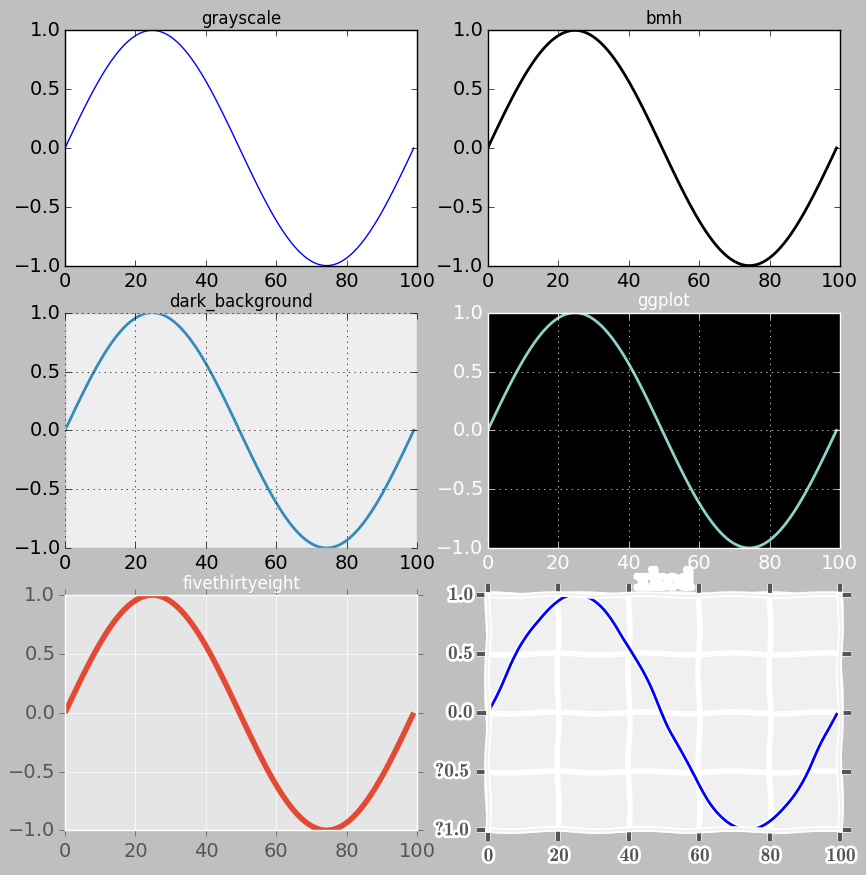

In [10]:
rcdefaults() # Esto pone el estilo en el estilo por defecto
figure(figsize=(10,10))
angs=linspace(0,2*pi,100)
for i in range(5):
    subplot(3,2,i+1)
    style.use(estilos[i])
    plot(sin(angs))
    title(estilos[i],fontsize=12)
# Y para terminar el uso de un estilo temporal
with xkcd():
    subplot(3,2,6)
    plot(sin(angs))
    title("xkcd")
show()
rcdefaults() # Esto pone el estilo en el estilo por defecto

## inline y no inline

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


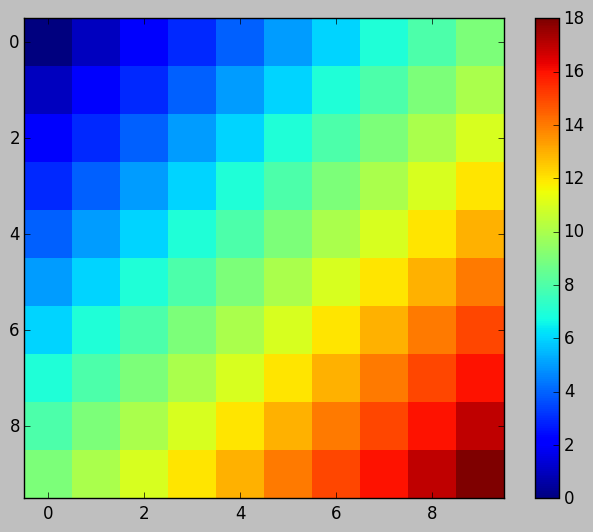

In [12]:
# En una ventana interactiva
rcdefaults()
matriz=zeros((10,10))
for i in range(10):
    for j in range(10):
        matriz[i,j]=i+j

fig=figure()
imshow(matriz,interpolation='None')
grid(False)
colorbar()
show()

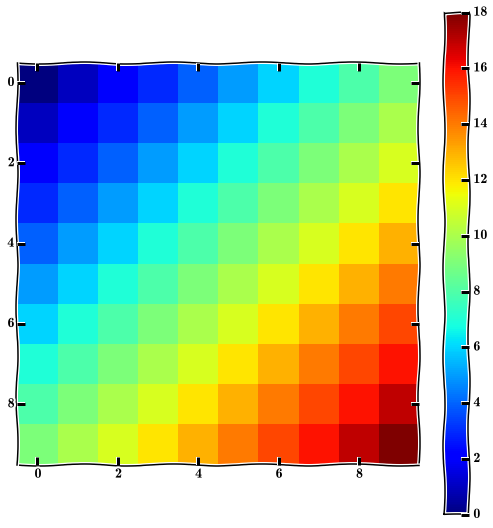

In [13]:
# En modo inline
# No todo puede hacerse inline, por ejemplo animaciones y widgets.
%matplotlib inline
xkcd()
matriz=zeros((10,10))
for i in range(10):
    for j in range(10):
        matriz[i,j]=i+j

fig=figure(figsize=(9,9))
imshow(matriz,interpolation='none')
grid(False)
colorbar()
show()

## streamplot, contour, widget, animation

### streamplot

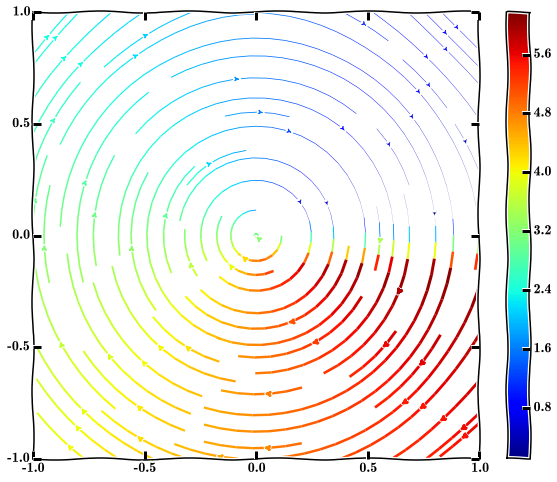

In [14]:
%matplotlib inline
def arctan4(y,x):
    arc=arctan2(y,x)
    if arc<0:
        return 2*pi+arc
    else:
        return arc
with xkcd():
    arctan3=vectorize(arctan4)
    figure(figsize=(10,8))
    x=linspace(-1,1,10)
    y=linspace(-1,1,10)
    xg,yg=meshgrid(x,y)
    angles=arctan3(yg,xg)
    streamplot(x,y,yg,-xg,color=angles,linewidth=0.5*angles)
    colorbar()
    show()

### contour

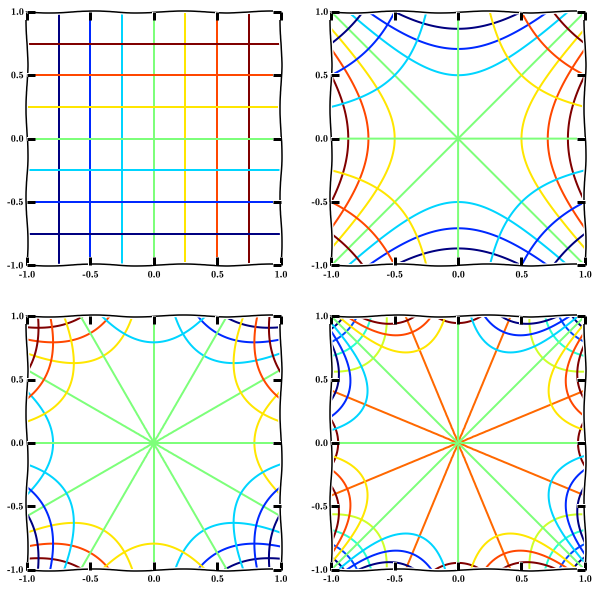

In [15]:
fig=figure(figsize=(10,10))
x=linspace(-1,1,100)
y=linspace(-1,1,100)
xg, yg = meshgrid(x,y)
subplot(2,2,1)
contour(x,y,xg)
contour(x,y,yg)
subplot(2,2,2)
contour(x,y,xg**2-yg**2)
contour(x,y,xg*yg)
subplot(2,2,3)
contour(x,y,xg**3-3*xg*yg**2)
contour(x,y,3*x**2*yg-yg**3)
subplot(2,2,4)
contour(x,y,xg**4-6*xg**2*yg**2+yg**4)
contour(x,y,4*xg**3*yg-4*xg*yg**3)
show(fig)

### widget

TypeError: 'module' object is not callable

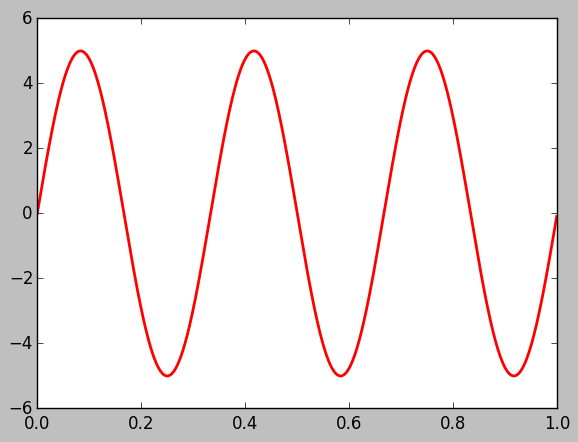

In [16]:
# Modificado de http://matplotlib.org/examples/widgets/slider_demo.html
from matplotlib.widgets import RadioButtons
from matplotlib import *
from numpy import *
#%matplotlib osx
rcdefaults() # No works with xkcd style
fig, ax = subplots()
subplots_adjust(left=0.25, bottom=0.25)
t = arange(0.0, 1.0, 0.001)
a0 = 5 # Amplitud inicial
f0 = 3 # Frecuencia inicial
s = a0*sin(2*np.pi*f0*t) # Función a graficar
l, = plot(t,s, lw=2, color='red')
axis([0, 1, -10, 10]) # Fijar los ejes

axcolor = 'lightgoldenrodyellow'
axfreq = axes([0.25, 0.1, 0.65, 0.03], axisbg=axcolor)
axamp  = axes([0.25, 0.15, 0.65, 0.03], axisbg=axcolor)

# Configurar los deslizadores

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0) 
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0) 

def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()

sfreq.on_changed(update)
samp.on_changed(update)

resetax = axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
def reset(event):
    sfreq.reset()
    samp.reset()

button.on_clicked(reset)

rax = axes([0.025, 0.5, 0.15, 0.15], axisbg=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)
def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()

radio.on_clicked(colorfunc)

show()

### animation

In [17]:
%pylab
from matplotlib import animation

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [27]:
choreography=genfromtxt("/Users/phoenix/Temp/coreo.csv",delimiter=",")
x1=choreography[:,1]
x2=choreography[:,3]
x3=choreography[:,5]
y1=choreography[:,2]
y2=choreography[:,4]
y3=choreography[:,6]
t=choreography[:,0]

In [28]:
# Solo las posiciones de los planetas
%matplotlib osx
fig=figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1.5, 1.5), ylim=(-1.0, 1.0))
ax.grid()
line, = ax.plot([], [], 'o', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
dt = 0.05
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [x1[i], x2[i], x3[i]]
    thisy = [y1[i], y2[i], y3[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template%(i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
    interval=25, blit=False, init_func=init)

show()

In [30]:
# Add the trail and make final ajustes
%matplotlib osx
fig=figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1.5, 1.5), ylim=(-1.0, 1.0))
ax.grid(True) # Add grid
ax.set_aspect('equal')

completetrayectory = ax.plot(x1,y1,"--k",alpha=0.4)
title("Gravitational Choreography\n")

# The following three plot the trails
trayectory1, = ax.plot([], [], '-', lw=2,label="mars")
trayectory2, = ax.plot([], [], '-', lw=2,label="earth")
trayectory3, = ax.plot([], [], '-', lw=2,label="venus")

# The following three plot the current positions
planet1, = ax.plot([], [], 'ok', lw=2)
planet2, = ax.plot([], [], 'ok', lw=2)
planet3, = ax.plot([], [], 'ok', lw=2)

legend()
time_template = 'time = %.2f'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
dt = 0.05

def animate(i):
    if( i<10 ):
        mini=0
    else:
        mini=i-10
    thisx1 = x1[mini:i]
    thisy1 = y1[mini:i]
    thisx2 = x2[mini:i]
    thisy2 = y2[mini:i]
    thisx3 = x3[mini:i]
    thisy3 = y3[mini:i]

    trayectory1.set_data(thisx1, thisy1)
    trayectory2.set_data(thisx2, thisy2)
    trayectory3.set_data(thisx3, thisy3)
    
    planet1.set_data([x1[i]],[y1[i]])
    planet2.set_data([x2[i]],[y2[i]])
    planet3.set_data([x3[i]],[y3[i]])
    time_text.set_text(time_template%(i*dt))
    return trayectory1, trayectory2, trayectory3, planet1, planet2, planet3, time_text



animacion = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
    interval=10, blit=False)

#animacion.save('/Users/juan/Temp/grav_choreography.mp4', fps=15)
show()

## mplot3D

In [207]:
from mpl_toolkits.mplot3d import Axes3D

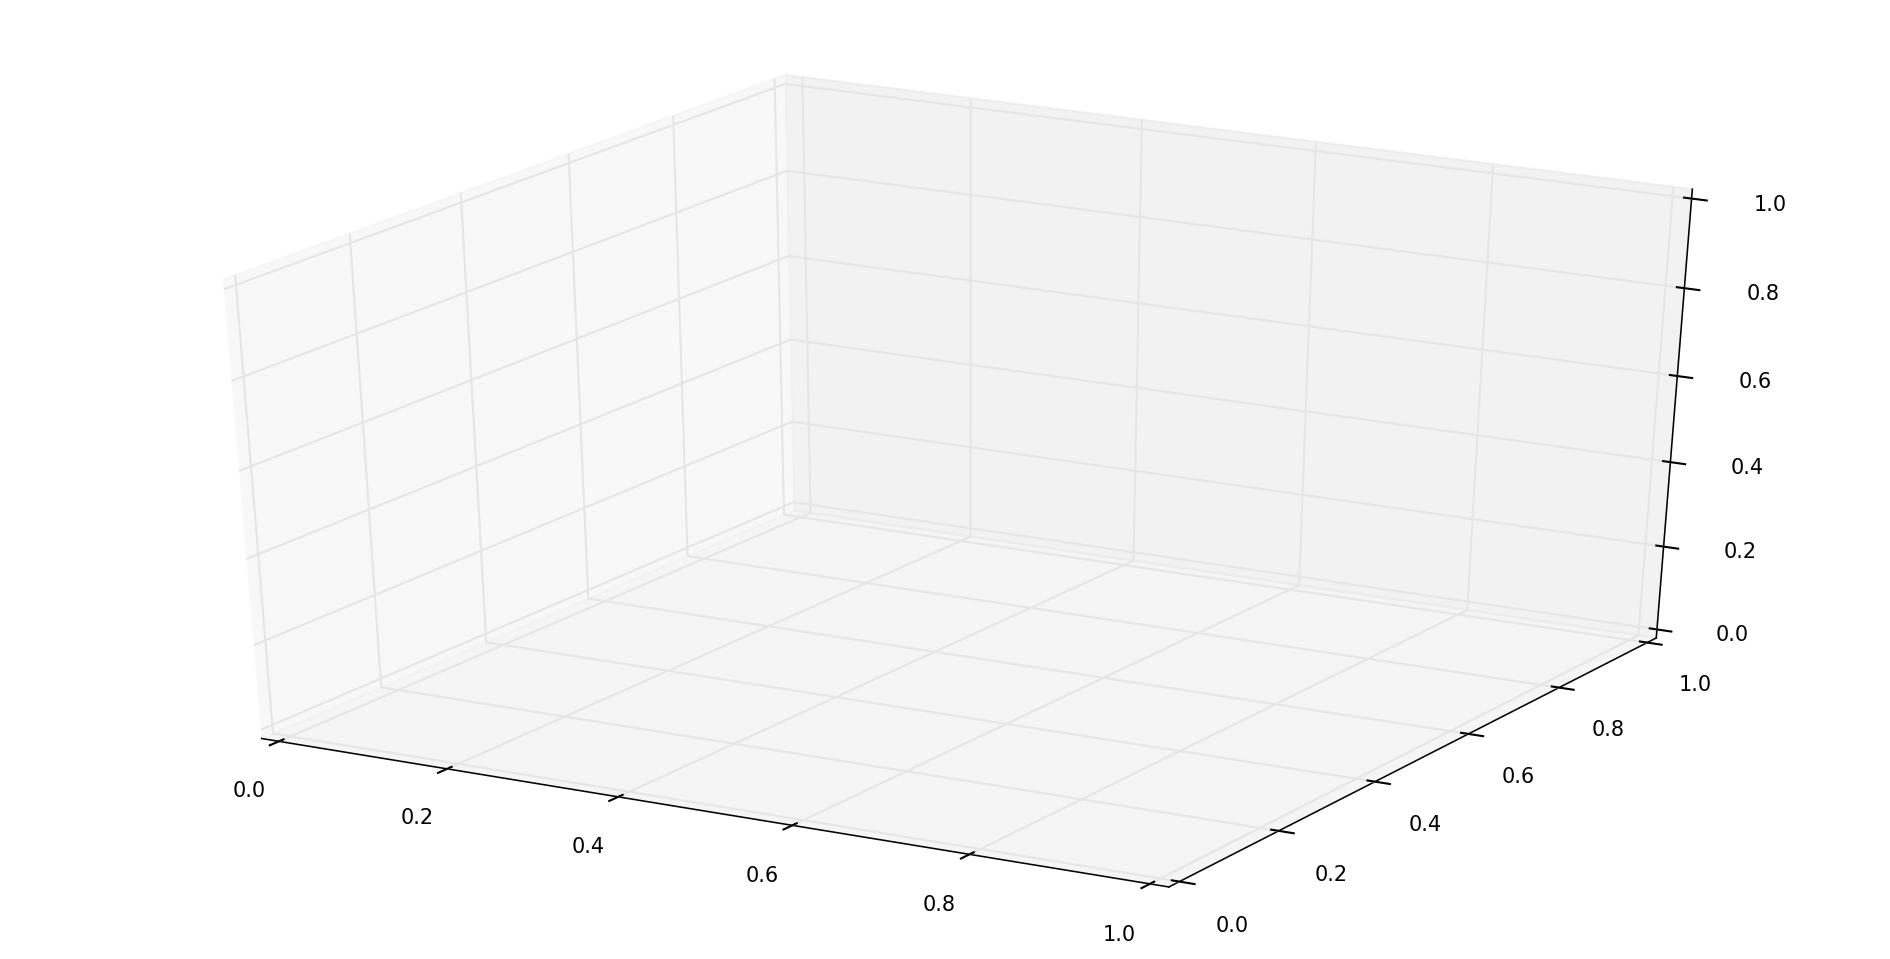

In [208]:
# Unos ejes vacíos
fig = figure()
ax = fig.gca(projection='3d')
show()

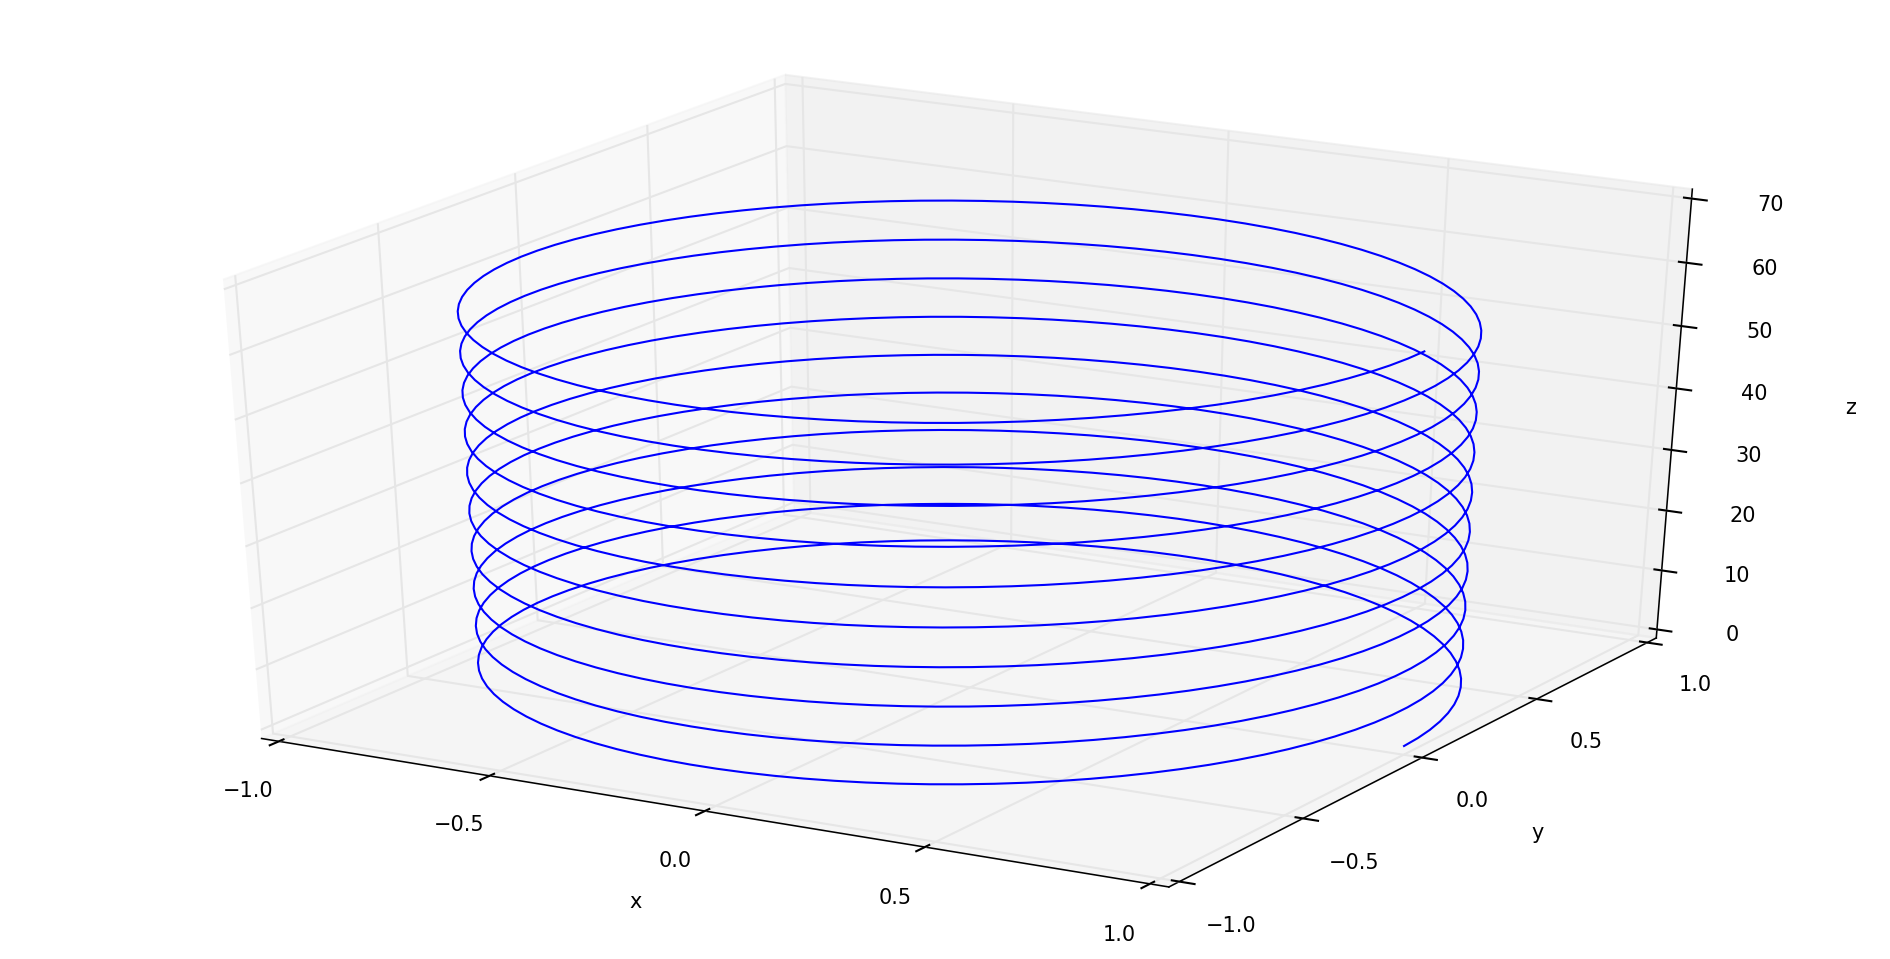

In [209]:
# Una curva paramétrica
t=linspace(0,20*pi,1000)
fig = figure()
ax = fig.gca(projection='3d')
ax.plot(cos(t),sin(t),t)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
show()

In [210]:
nums=randn(3,1000)
norms=apply_along_axis(linalg.norm,0,nums)
normnums=nums/norms
normnums.T;

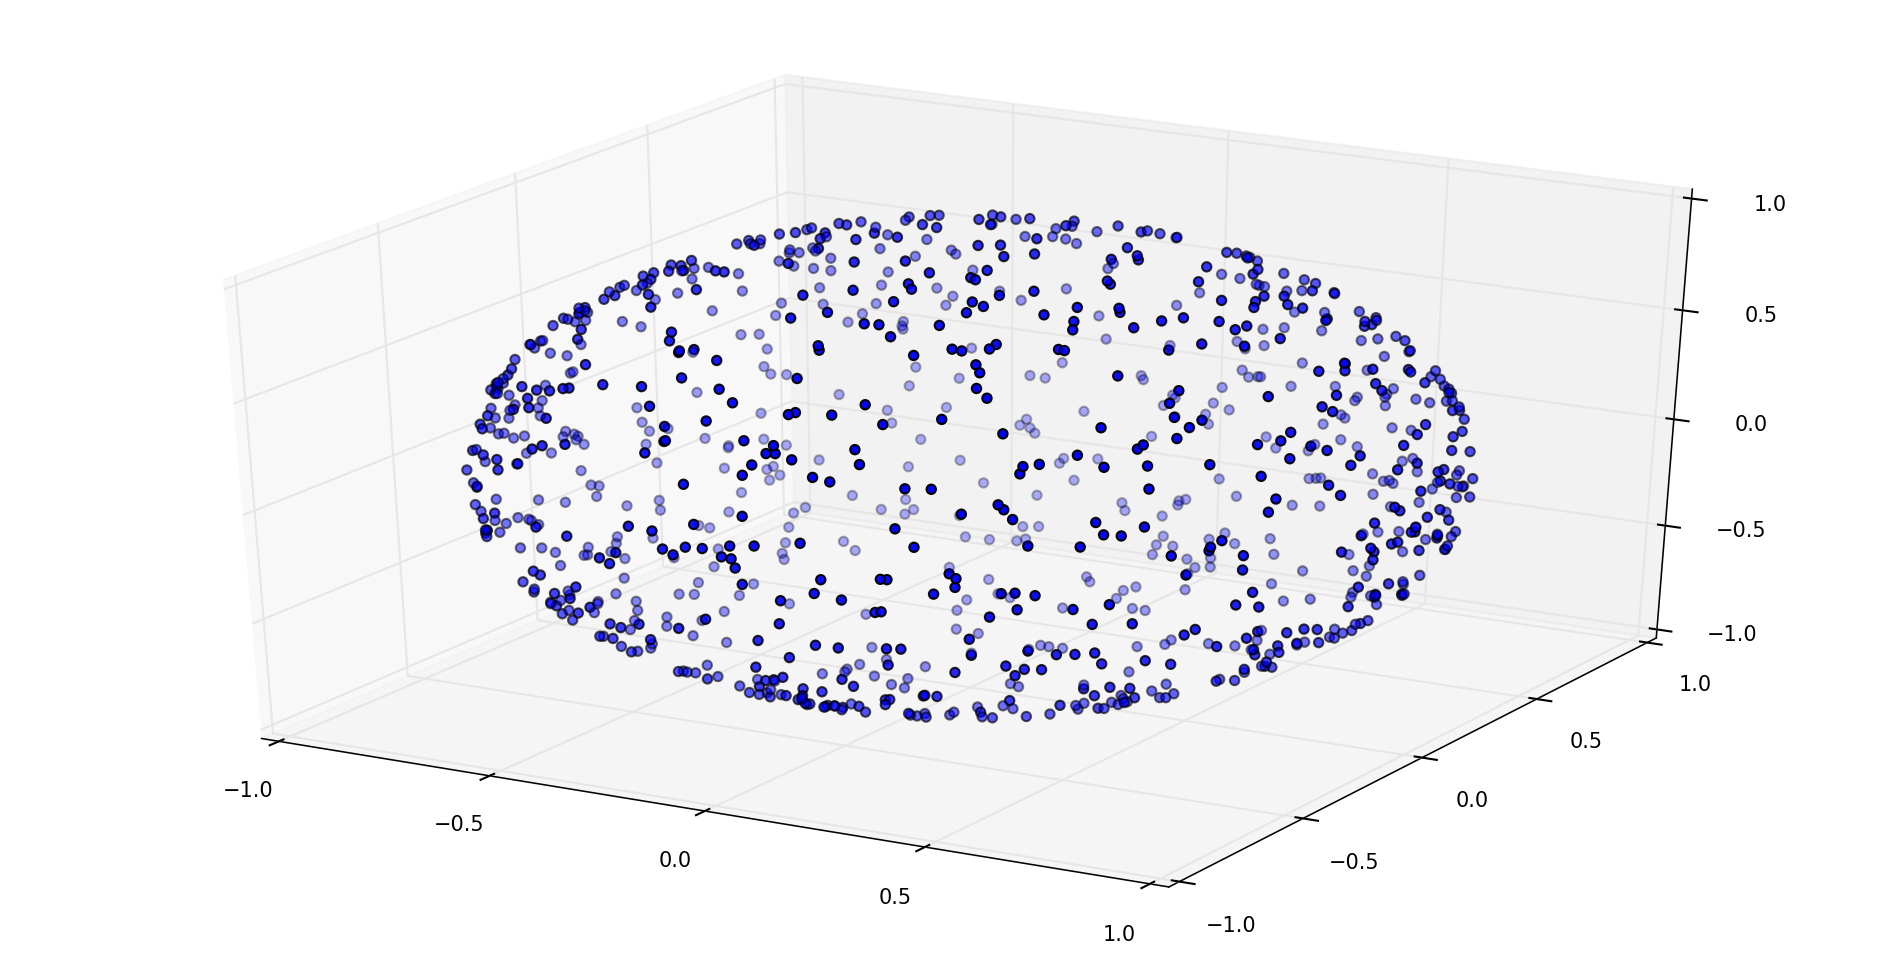

In [211]:
# Una gráfica de dispersión
fig=figure()
ax = fig.gca(projection='3d')
ax.scatter(normnums.T[:,0],normnums.T[:,1],normnums.T[:,2])
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
show()

In [2]:
# Gráfica de una función de dos varialbes
# Modificado a partir de http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#surface-plots
%matplotlib inline
x=linspace(-4*pi,4*pi,100)
y=linspace(-4*pi,4*pi,100)
xg, yg = meshgrid(x,y)
fig=figure()
ax=fig.gca(projection='3d')
R = sqrt(xg**2 + yg**2)
zg = sin(R)
surf = ax.plot_surface(xg, yg, zg, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=True)
ax.set_zlim(-1.0, 3.0)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

show()

NameError: name 'figure' is not defined

## Heat equation

In [3]:
# Placa fría con borde caliente
placa=zeros((side,side))
placa[:,0]=1
placa[:,-1]=1
placa[0,:]=1
placa[-1,:]=1

#fig1=figure()
tplot=imshow(placa,interpolation='None')
colorbar()

while placa[side/2,side/2]<0.9:
    tempplaca=copy(placa)
    for i in range(1,side-1):
        for j in range(1,side-1):
            tempplaca[i,j]=0.25*(placa[i-1,j]+placa[i+1,j]+placa[i,j-1]+placa[i,j+1])
    tplot.set_data(tempplaca)
    placa=tempplaca
    pause(0.1)
    show()


NameError: name 'side' is not defined

In [25]:
# Ahora usando animate.FuncAnimation
%matplotlib osx
side=20
from matplotlib import animation
# Placa fría con borde caliente
placa=zeros((side,side))
placa[:,0]=1
placa[:,-1]=1
placa[0,:]=1
placa[-1,:]=1

fig=figure()
tplot=imshow(placa,interpolation='None')
colorbar()

def animate(i):
    global placa
    tempplaca=copy(placa)
    for i in range(1,side-1):
        for j in range(1,side-1):
            tempplaca[i,j]=0.25*(placa[i-1,j]+placa[i+1,j]+placa[i,j-1]+placa[i,j+1])
    tplot.set_array(tempplaca)
    placa=tempplaca
    return placa,

animacion = animation.FuncAnimation(fig, animate, arange(1,100),interval=20, blit=False)
show()

In [1]:
%pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [31]:
# Usando animate.AristAnimation
from matplotlib import animation
%matplotlib osx
rcdefaults()
side=30
# Placa fría con borde caliente
placa=zeros((side,side))
placa[:,0]=1
placa[:,-1]=1
placa[0,:]=1
placa[-1,:]=1

fig = figure()
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

angs=linspace(0.,2*3.14,100)
def f(x, y):
    return sin(x) + cos(y)

x = linspace(0, 2 * pi, 120)
y = linspace(0, 2 * pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []

while placa[side/2,side/2]<0.9:
    tempplaca=copy(placa)
    for i in range(1,side-1):
        for j in range(1,side-1):
            tempplaca[i,j]=0.25*(placa[i-1,j]+placa[i+1,j]+placa[i,j-1]+placa[i,j+1])
    im1=ax1.imshow(tempplaca,interpolation='None',vmin=0,vmax=1)
    ax2.set_xlabel("x")
    ax2.set_ylabel("T")
    ax2.set_xlim(1,side)
    #ax2.plot(range(1,side+1),tempplaca[:,side/2],"ro")
    im2,=ax2.plot([0,side],[0.9,0.9],"-k")
    im3,=ax2.plot(range(1,side+1),tempplaca[:,side/2],"ro")
    placa=tempplaca
    ims.append([im1,im2,im3])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=False)
#ani.save('dynamic_images.mp4')
show(fig)

## LAMMPS

### Indentation example

In [6]:
import os.path
indent=genfromtxt(os.path.expanduser("~/Documents/Trabajo/Andes/2015-V/MetodosComputacionales/hands_on/lammps/indentdump.csv"),delimiter=",")
x=indent[:,0]
y=indent[:,1]

In [7]:
# LAMMPS graph of indent example
#! grep -A420 "ITEM: ATOMS id type xs ys zs" dump.indent | sed 's/^[^0-9].*//g' | sed '/^\s*$/d' | awk '{print $3","$4}' > indent.csv 
%matplotlib osx
rcdefaults()
from matplotlib import animation
fig=figure()
ax=fig.add_subplot(1,1,1,autoscale_on=False, xlim=(-0.1, 1.1), ylim=(-0.1, 1.1))
ax.grid(True)
ax.set_aspect('equal')

ims=[]
for i in range(len(x)/420):
    thisx = x[420*i:420*i+420]
    thisy = y[420*i:420*i+420]
    im1,=ax.plot(thisx,thisy,"ow",ms=15)
    im2=ax.text(0.5,1.05,"N="+str(i*250),horizontalalignment='center')
    ims.append([im1,im2])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=False)
#ani.save('dynamic_images.mp4')
show(fig)

### Balance Example

In [8]:
balance=genfromtxt(os.path.expanduser("~/Documents/Trabajo/Andes/2015-V/MetodosComputacionales/hands_on/lammps/balancedump.csv"),delimiter=",")
x=balance[:,0]
y=balance[:,1]

In [9]:
# LAMMPS graph of balance example
#! grep -A361 "ITEM: BOX BOUNDS ff ff pp" balance.dump | sed 's/^[^0-9].*//g' | sed '/^\s*$/d' | awk '{print $4","$5}' > balancedump.csv 
%matplotlib osx
rcdefaults()
from matplotlib import animation
num_atoms=361
fig=figure()
ax=fig.add_subplot(1,1,1,autoscale_on=False, xlim=(-0.1, 59), ylim=(-0.1, 41))
ax.grid(True)
ax.set_aspect('equal')

ims=[]
for i in range(len(x)/num_atoms):
    thisx = x[num_atoms*i:num_atoms*i+num_atoms]
    thisy = y[num_atoms*i:num_atoms*i+num_atoms]
    im1,=ax.plot(thisx,thisy,"ok",ms=5)
    im2=ax.text(5,38,"N="+str(i*50),horizontalalignment='center')
    ims.append([im1,im2])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=False)
#ani.save('dynamic_images.mp4')
show(fig)